# Hist 3368 Week 6 Research Co-located Words and Graph Them Over Time

A 'collocate' in textual research is a word that is co-located with another word: that is, the two words occur in the same phrase, sentence, speech, or debate.

Analysts study collocates in order to make sense of the changing discourse around certain vocabulary.

This notebook is about giving you the skills to inspect the words that make up the collocates for a certain keyword, and to track their co-occurrence over time.  

This notebook gives basic code sufficient to start a research project -- but insufficient to constitute a research project.  A researcher using this code would typically iterate through this code with many different combinations of words and their collocates in order to understand how a group of words hangs together.

## Hansard

Hansard is a data set of the 19th-century British Parliamentary debates. Please note: to use Hansard you must significantly increase the memory requested for your JupyterLab session. Per the README, you are suggested to request `64G`. This might result in a longer wait for launching your job but will allow you to hold all of the data in dataframe in memory.

In [1]:
import pandas as pd

hansard = pd.read_csv('/scratch/group/history/hist_3368-jguldi/hansard_justnine_12192019.csv')

hansard.head(5) # view just the first five rows

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20
0,S1V0001P0_0,S1V0001P0,0,0,0,0,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,moved that Lord Walsingham be appointed chairm...,Lord Hawkesbury,NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,Walsingham,PERSON,NaN
1,S1V0001P0_1,S1V0001P0,0,1,0,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"in seconding the motion, took an opportunity t...","The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN
2,S1V0001P0_2,S1V0001P0,0,2,1,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"—The question was put, and the appointment for...","The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN
3,S1V0001P0_3,S1V0001P0,0,3,0,2,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"then rose, and observed, that he was not in th...",Lord Walsingham,NaN,HOUSE OF LORDS.,S1V0001P0I0024,12.0,False,two,CARDINAL,NaN
4,S1V0001P0_4,S1V0001P0,0,4,1,2,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,He had to return his thanks to the House for t...,Lord Walsingham,NaN,HOUSE OF LORDS.,S1V0001P0I0024,12.0,False,"House,House,House","ORG,ORG,ORG",NaN


After loading the Hansard data we can take a subset so its is smaller and easier to work with. A subset can be thought of as a slice of the data containing just the criteria in which you are interested. 

This section will demonstrate two ways to take a subset: 1) by date and 2) by the contents of a column.

To subset the data by date, first convert the speechdate column from integers to datetimes objects.

In [2]:
hansard['speechdate']=pd.to_datetime(hansard['speechdate'], errors='coerce') # any errors are forced to NaN

In [5]:
hansard['year'] = pd.DatetimeIndex(hansard['speechdate']).year

Now you can filter for debates from before 1900 . . .

In [6]:
hansard1800s = hansard[hansard['year'] < 1900]

In [7]:
hansard1800s.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,...,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20,year
0,S1V0001P0_0,S1V0001P0,0,0,0,0,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,...,Lord Hawkesbury,NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,Walsingham,PERSON,NaN,1803
1,S1V0001P0_1,S1V0001P0,0,1,0,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,...,"The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN,1803
2,S1V0001P0_2,S1V0001P0,0,2,1,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,...,"The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN,1803


. . . or debates from just the 1870s.

In [8]:
hansard_1870 = hansard[(hansard['year'] >= 1870) & (hansard['year'] <= 1878)]

In [9]:
hansard_1870.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,...,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20,year
4606897,S3V0199P0_0,S3V0199P0,0,0,0,342939,41076,1870-02-08,THE QUEEN'S SPEECH.,Uncategorized,...,THE LORD CHANCELLOR,NaN,"HOUSE OF LORDS,",S3V0199P0I0051,2.0,False,"SPEECH,Houses of Parliament","ORG,ORG",NaN,1870
4606898,S3V0199P0_1,S3V0199P0,4,0,0,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,...,THE MARQUESS OF HUNTLY,NaN,"HOUSE OF LORDS,",S3V0199P0I0054,7.0,False,My Lords,PERSON,NaN,1870
4606899,S3V0199P0_2,S3V0199P0,4,1,1,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,...,THE MARQUESS OF HUNTLY,NaN,"HOUSE OF LORDS,",S3V0199P0I0054,7.0,False,Lordships,ORG,NaN,1870


You can also filter for speakers with the name "Gladstone." 

In [10]:
hansard1800s = hansard1800s[(hansard1800s['speaker'].str.contains('Gladstone'))].copy()

In [11]:
hansard1800s.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,...,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20,year
269940,S1V0040P0_4623,S1V0040P0,2,12,0,25550,3377,1819-05-06,SECOND REPORT.,Uncategorized,...,Mr. Gladstone,NaN,HOUSE OF COMMONS.,S1V0040P0I0090,164.0,False,"House,East,West,Bank,two,three millions,Britis...","ORG,LOC,LOC,ORG,CARDINAL,CARDINAL,NORP,NORP",NaN,1819
269941,S1V0040P0_4624,S1V0040P0,2,13,1,25550,3377,1819-05-06,SECOND REPORT.,Uncategorized,...,Mr. Gladstone,NaN,HOUSE OF COMMONS.,S1V0040P0I0090,164.0,False,"5th,July,Bank,Committee,5th","ORDINAL,DATE,ORG,ORG,ORDINAL",NaN,1819
269942,S1V0040P0_4625,S1V0040P0,2,14,2,25550,3377,1819-05-06,SECOND REPORT.,Uncategorized,...,Mr. Gladstone,NaN,HOUSE OF COMMONS.,S1V0040P0I0090,164.0,False,NaN,NaN,NaN,1819


If you wanted to be more specific, you could return instances where speaker "Gladstone" utters the word "Dublin."

In [12]:
hansard1800s = hansard1800s[(hansard1800s['speaker'].str.contains('Gladstone'))&(hansard1800s['text'].str.contains('Dublin'))].copy()

In [13]:
hansard1800s.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,...,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20,year
1032945,S3V0018P0_7180,S3V0018P0,3,371,20,87660,9793,1833-06-03,MINISTERIAL PLAN FOR THE ABOLITION OF SLAVERY. ],Uncategorized,...,Mr. William E. Gladstone,NaN,"HOUSE OF COMMONS,",S3V0018P0I0173,330.0,False,"Dublin,the West Indians","GPE,NORP",NaN,1833
1258618,S3V0030P0_14983,S3V0030P0,3,28,8,104930,11485,1835-08-21,THE SUPPLIES. —CONDUCT OF THE PEERS. ],Uncategorized,...,Mr. William Ewart Gladstone,NaN,"HOUSE OF COMMONS,",S3V0030P0I0426,824.0,False,Dublin,GPE,NaN,1835
1479435,S3V0042P0_4807,S3V0042P0,0,1135,194,119589,13199,1838-03-30,NEGRO APPRENTICESHIP—ADJOURNED DEBATE. ],Uncategorized,...,Mr. W. E. Gladstone,NaN,"HOUSE OF COMMONS,",S3V0042P0I0118,224.0,False,"Dublin,O'Connell,the West Indies","GPE,PERSON,GPE",NaN,1838


## Research in Hansard

### Look for word1

Let's talk about how to dive deeper into research.

First, define the word or phrase that you want to look for.

In [55]:
word1 = "slavery"

We learned that we can use **str.count()** to count the individual occurrences of a word per speech. str.count() takes one object, the word you're looking for. We're looking for *word1*, which is a variable containing the word 'malpractice.'

We can also use **.sort_values()** to tell pandas to sort the data by the values in one column.  .sort_values() takes the arguments "by" (where you tell it which column to use, using quotation marks, and "ascending," which can be True or False, depending on how you want your values arranged.

In [56]:
hansard['keywordcount'] = hansard['text'].str.count(word1)
hansard.sort_values(by = 'keywordcount', ascending = False)[:5]

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,...,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20,year,keywordcount
2457117,S3V0099P0_19122,S3V0099P0,3,386,102,174603,20678,1848-06-29,SUGAR DUTIES—ADJOURNED DEBATE (FIFTH NIGHT).,Uncategorized,...,NaN,"HOUSE OF COMMONS,",S3V0099P0I0679,1335.0,False,NaN,NaN,NaN,1848,5
442530,S2V0007P0_25917,S2V0007P0,1,100,100,36152,4486,1822-07-25,SLAVERY AT THE CAPE OF GOOD HOPE.,Uncategorized,...,NaN,HOUSE OF COMMONS.,S2V0007P0I0910,1783.0,False,"House,the Cape of Good Hope,Slave,Slave,House,...","ORG,LOC,PRODUCT,PRODUCT,ORG,QUANTITY,ORG,NORP",NaN,1822,5
9942085,S4V0152P0_1090,S4V0152P0,26,226,14,959439,144524,1906-02-26,THE TRANSVAAL AND ORANGE RIVER COLONIES.,Uncategorized,...,NaN,HOUSE OF LORDS.,S4V0152P0I0576,721.0,False,"hundreds,thousands,the hundreds of thousands","CARDINAL,CARDINAL,MONEY",NaN,1906,5
571911,S2V0015P0_8202,S2V0015P0,2,31,11,46082,5681,1826-04-25,WEST INDIA PROPERTY—PETITION OF A. H. BEAUMONT...,Uncategorized,...,NaN,HOUSE OF COMMONS.,S2V0015P0I0298,578.0,False,"Bristol,Liverpool,African,the Board of Trade,J...","PERSON,GPE,NORP,ORG,GPE,GPE,ORG,ORG,GPE,ORG,DA...",NaN,1826,5
467820,S2V0009P0_4106,S2V0009P0,2,18,18,37678,4686,1823-05-15,ABOLITION OF SLAVERY. *],Uncategorized,...,NaN,HOUSE OF COMMONS.,S2V0009P0I0139,257.0,False,"British,British,one million,Spaniards,—""person...","NORP,NORP,CARDINAL,NORP,ORG,PERSON",NaN,1823,4


How many times was word1 used in each time period?

In [57]:
hansard['text'].str.count(word1).sum()

9189

In [78]:
year_1832 = hansard[hansard['year'] == 1832]
year_1880 = hansard[hansard['year'] == 1880]

In [79]:
year_1832['text'].str.count(word1).sum()

248

In [80]:
year_1880['text'].str.count(word1).sum()

21

What does the difference mean? 

### Get the context for word1

To get the context for word1, you must call up the full text for the speeches where the keyword appears.

Next, we can count the words that commonly appear around word1.

Using .str.count(word1) and .nlargest(n) give you a list of the rownumbers for the n speeches where word1 appears the most frequently.  The rownumbers are stored in the .index for the resulting series. We save the results as the variables *word1_speechnumbers*

We can use .loc() and the rownumbers to call up the full text of the speeches that correspond to word1_speechnumbers.  We will save the results as *word1_context.*

We then clean the data using stopwording, lowercasing, and punctuation stripping.

We then count the words that result using commands for breaking the string into words, giving each word a separate row, dropping empty rows, and counting the results:

    str.split().explode().dropna().value_counts()
    
    

In [81]:
import nltk
from nltk.corpus import stopwords

In [82]:
stop = set(stopwords.words('english'))

In [83]:
stopwords_regex = r'\b(?:{})\b'.format('|'.join(stop))

In [84]:
# get the rownumbers of the n speeches that use word1 the most
word1_1832_speechnumbers = year_1832['text'].str.count(word1).nlargest(10) 
word1_1880_speechnumbers = year_1880['text'].str.count(word1).nlargest(10) 

# get the speeches that mentioned word1 the most
word1_1832_context = year_1832.loc[list(word1_1832_speechnumbers.index)]
word1_1880_context = year_1880.loc[list(word1_1880_speechnumbers.index)]
                                
# clean up the data
word1_1832_context['cleanspeech'] = word1_1832_context['text'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
word1_1832_context['stopworded'] = word1_1832_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

word1_1880_context['cleanspeech'] = word1_1880_context['text'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
word1_1880_context['stopworded'] = word1_1880_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

In [85]:
# count the other words that appear in the context of word1 in 1967
word1_1832_context_count = word1_1832_context["stopworded"].str.split().explode().dropna().value_counts()
word1_1832_context_count[:20]

slavery         22
state            5
house            4
upon             4
indies           3
subject          3
could            3
property         3
west             3
individuals      2
never            2
professed        2
hoped            2
means            2
much             2
negroes          2
extinguished     2
christianity     2
would            2
gradually        2
Name: stopworded, dtype: int64

In [86]:
# count the other words that appear in the context of word1 in 1967
word1_1880_context_count = word1_1880_context["stopworded"].str.split().explode().dropna().value_counts()
word1_1880_context_count[:20]

slavery          10
whether           7
government        7
take              3
asked             3
british           3
john              3
reduced           3
population        3
rights            3
majestys          3
state             3
suppression       2
attention         2
roumelia          2
exterminated      2
sir               2
extermination     2
bulgaria          2
states            2
Name: stopworded, dtype: int64

### Inspect the data for word1 at different moments in time.

How many times was word1 was used in individual speeches in particular months? We just counted.  Let's call up the results and look.

Note that in the table below there are two columns: a left-hand column which is an "index;" those are just the finding-aid numbers of the speeches.  A right-hand column gives the number of times word1 appears in that speech. 

In [87]:
word1_1832_speechnumbers

916301    3
928229    3
962628    3
881595    2
903881    2
909257    2
916330    2
925892    2
928234    2
928388    2
Name: text, dtype: int64

Look at the speech that mentions word1 the most -- the speech listed on the top.  Find its index number in the left-hand column. 

We can look up information about that speech -- for instance the speaker and the text of the speech -- using its index number.  

Who gave the speech?

In [88]:
word1_1832_context['speaker'][916301][:1000]

'The Duke of Wellington'

When did he give the speech?

In [89]:
word1_1832_context['speechdate'][916301]

Timestamp('1832-04-17 00:00:00')

What did the speech say?

In [90]:
word1_1832_context['text'][916301][:1000]

'He had hoped for an amelioration of slavery by the means proposed; he had hoped that the condition of the slaves would be much but gradually improved, and that slavery would be gradually extinguished; but the Parliament had never contemplated the compulsory extinction of slavery, or anything which was to destroy the property of the proprietors.'

I've cut the quote short.  You can see the whole speech for yourself by deleting the [:1000] at the end of the line of code.


#### The importance of keeping going

Keep going until you understand! You'll want to quote the evidence you gather.  Note that these speeches are selected at random from the list of speechnumbers that appear in the dataset.


In [91]:
word1_1832_context['text'][928229]

'It was not then his intention, upon the presentation of a petition, to enter into the question of slavery, or to make what was called an anti-slavery speech: his object was, very briefly and shortly, to state his own individual notion of slavery.'

Use command-F or EDIT > FIND in the menu above to search for word1 in your screen until you see the context.  


### Inspect the data for word1 in August

Let's look at word1 in another period

In [92]:
word1_1880_speechnumbers

5746489    1
5753879    1
5767133    1
5781313    1
5785210    1
5785211    1
5787122    1
5787835    1
5793782    1
5796343    1
Name: text, dtype: int64

Let's look at the top speech.  Who gave the speech?.

In [93]:
word1_1880_context['speaker'][5746489]

'MR. ANDERSON'

When did he give the speech?

In [94]:
word1_1880_context['speechdate'][5746489]

Timestamp('1880-02-12 00:00:00')

What did the speech say?

In [95]:
word1_1880_context['text'][5746489]

'asked the Secretary of State for the Colonies, If it be the fact that Sir John Smale, the Chief Justice of Hong Kong, has declared that a system of slavery has grown up there and has been tolerated under British rule, while contrary to British Law; and what steps Government has taken, or proposes taking, to deal with the evil?'

## Implementing KeyWords in Context (KWIC)

For this last exercise we will find keywords in context (KWIC). You can think of KWIC's output like the lines of a concordance, where you look up a passage and find the context.  We saw in the reading that historian Luke Blaxill used KWIC to make arguments about how different words were used in British election speeches.

KWIC is not the only view you need to understand the context of speeches, but it is a useful one.

To produce this output, we will split the text into n-grams where "n" stands for any number. For example, a text split into single words (like our data frame in the previous example) is split into 1-grams (also just called "tokens"). 3-grams split the text into units that are 3 words long. 5-grams split the text into units that are 5 words long. 

Now let's write a function that returns our keyword in context. You don't need to follow the code, but you should know that you can always use the function below when you want to generate a KWIC view.

In [98]:

keyword_df_1832 = year_1832[year_1832['text'].str.contains(word1)].copy() # search the text for the presence of our keyword 

def KWIC(body):
    n = 5 # specify the number of surrounding words to use before and after the keyword
    
    words = body.split() # split the words into tokens
    keyword_index = 0
    
    # The following for loop iterates through each word in the text. If our keyword is found, the for loop stores its index. 
    # But, why are we storing the index? As you might remember, the index is a numerical representation of the row's position.
    # It can also be thought of as a unique name the computer uses to identify a row. We can call the index to return JUST these rows.
    for index, word in enumerate(words): 
        if word1 in word: 
            keyword_index = index
            break
    
    before_keyword = words[max(0, keyword_index - n):keyword_index] # store the words that come before the keyword, up to our specified number 
    after_keyword = words[keyword_index:keyword_index + n] # store the words that come after the keyword, up to our specified number 
    return ' '.join(before_keyword + after_keyword) # return the keyword in its context

keyword_df_1832['context'] = keyword_df_1832['text'].apply(KWIC)

In [99]:
keyword_df_1832[['context']]

,context
865003,Had they proved that slavery was a part of
877040,by the excessive sufferings and slavery the ch...
881595,"Much was said about slavery in the West Indies,"
890447,first introduced the subject of slavery to the...
890460,certain measures with respect to slavery; and ...
...,...
964499,had been emancipated from Turkish slavery by t...
964507,"lain for centuries in abject slavery, under a ..."
964559,"then in a state of slavery, and while the Turks"
964958,"inimical to the abolition of slavery, while at..."


This data frame is a little difficult to look at, so I am going to export the contents to a file.  You can find this file in the left-hand sidebar of Jupyter and open it on your home computer to inspect later via an application such as excel.

In [52]:
keyword_df['context'].to_csv('KWIC_example_keyword_cotton_in_hansard_1832.csv', sep = ' ', index=False, header = True)

Can you make a KWIC table for 1880?

## Looking for collocates over time

Here is a chunk of code for preparing the software packages, data, controlled vocabulary, and stopwords. 

***Please remember that loading data takes a few minutes. Be patient. If you're running this after having run the previous blocks in the notebook, you can skip this section. ***

In [ ]:
Let's look for how frequently word1 was used in the context of other words

In [103]:
word1_1832_context_count[:30]

slavery         22
state            5
house            4
upon             4
indies           3
subject          3
could            3
property         3
west             3
individuals      2
never            2
professed        2
hoped            2
means            2
much             2
negroes          2
extinguished     2
christianity     2
would            2
gradually        2
question         2
petition         2
condition        2
mode             1
sussex           1
contemplated     1
expecting        1
extinction       1
although         1
happiness        1
Name: stopworded, dtype: int64

In [149]:
word1_1880_context_count[:30]

slavery          10
whether           7
government        7
take              3
asked             3
british           3
john              3
reduced           3
population        3
rights            3
majestys          3
state             3
suppression       2
attention         2
roumelia          2
exterminated      2
sir               2
extermination     2
bulgaria          2
states            2
secretary         2
mussulman         2
provinces         2
russian           2
africa            2
secure            2
colonies          2
egypt             2
lord              2
mahometan         2
Name: stopworded, dtype: int64

Some of these words are more interesting than others. Let's make a set of words to investigate further.  Note that we use the singular form of all words, because we will be lemmatizing our text later on.

In [152]:
vocab = ['indie', 'property', 'negro', 'christianity', 'happiness', 'extinct', 'right', 'government', 'exterminat', 'russia', 'colony', 'bulgaria', 'population']
import re 
vocabpattern = r"(?=\b("+'|'.join(vocab)+r")\b)"  
vocabpattern

'(?=\\b(indie|property|negro|christianity|happiness|extinct|right|government|exterminat|russia|colony|bulgaria|population)\\b)'

In [153]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob
import re
import nltk
from nltk.corpus import wordnet as wn
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker 

Let's find all the speeches in Hansard that mention word1.

In [154]:
word1_hansard = hansard[hansard["text"].str.contains(word1)]
word1_hansard = word1_hansard.drop(['sentence_id', 'src_file_id', 'file_section_id', 'section_sentence_id', 'section_monologue_id', 'speech_id', 'debate_id', 'speechdate', 'debate', 'section_category', 'constituency', 'speaker_house', 'src_image', 'src_column', 'sentence_errata', 'X20',], 1) # drop unused columns 

In [155]:
word1_hansard[:3]

,text,speaker,sentence_entities,entity_labels,year,keywordcount
16706,in fact the most of these were adverse to seei...,Lord King,NaN,NaN,1805,1
22158,in other words would you abridge us englishmen...,Mr. Huddlestone,"Africans!""—In,Report,malice!—,millions","ORG,ORG,ORG,CARDINAL",1805,1
22161,were the belligerent powers of europe hencefor...,Mr. Huddlestone,"Europe,colonies","LOC,GPE",1805,1


Here is a chunk of code for cleaning the text.

***Please note that the line .apply(lemmatizetext) is time consuming.  This code may take some time to run. If you're running this after having run the previous blocks in the notebook, you can skip this section. ******

In [156]:
###### Cleaning
word1_hansard['text'] = word1_hansard['text'].str.replace('[^\w\s]','') # strip punctuation
word1_hansard['text'] = word1_hansard['text'].str.lower() # lowercase
word1_hansard['text'] = word1_hansard['text'].str.split() # split into words
word1_hansard['lemmas'] = [[wn.morphy(word) for word in row] for row in word1_hansard['text']] # lemmatize each word in each row of the column 'lemmas'
word1_hansard['lemmas'] = [[word for word in row if word is not None] for row in word1_hansard['lemmas']] # if no lemma found, skip it.
word1_hansard['lemmas'] = [' '.join(row) for row in word1_hansard['lemmas']] # glue the individual list of lemmas back into one string per speech

Now let's find our vocabulary in the subset of speeches that include word1.

In [157]:
word1_hansard["vocab"] = word1_hansard["lemmas"].str.findall(vocabpattern)

In [158]:
vocabspeeches = word1_hansard[word1_hansard.astype(str)['vocab'] != '[]']
vocabspeeches = vocabspeeches.explode('vocab')
vocabspeeches[:3]

,text,speaker,sentence_entities,entity_labels,year,keywordcount,lemmas,vocab
22161,"[were, the, belligerent, powers, of, europe, h...",Mr. Huddlestone,"Europe,colonies","LOC,GPE",1805,1,be belligerent power europe henceforth condemn...,colony
22256,"[he, would, have, gentlemen, who, wished, to, ...",Mr. Wilberforce,NaN,NaN,1805,1,he have gentleman who wish continue trade refl...,negro
31546,"[i, demand, then, sir, of, the, house, i, dema...",Mr. Wallace,"Carnatic,Hobart","ORG,PERSON",1808,1,i demand then sir house i demand even who are ...,right


In [159]:
vocabspeeches2 = vocabspeeches[['year', 'vocab']]
vocab_per_year = vocabspeeches2.groupby(['year', 'vocab'])['vocab'].count()
vocab_per_year = pd.DataFrame(vocab_per_year) # convert from Series to DataFrame
vocab_per_year.columns = ['count'] # label the one column "count"
vocab_per_year = vocab_per_year.reset_index() # turn the multi-index into columns 'year' and 'vocab'
vocab_per_year[:5]

,year,vocab,count
0,1805,colony,1
1,1805,negro,1
2,1808,government,1
3,1808,right,1
4,1811,colony,1


## Visualize the vocab words over time



In the visualization that follows, we're going to create a scatter-plot of dots, where one dot shows how many times a word appears per month_year. We'll color the dots a different color for each word. Notice the plt.scatter() command, which tells matplotlib to use a scatterplot.

Creating complex plots of this kind sometimes involves writing a for loop where we're essentially layering a new plot for each word and changing the color each time. See if you can understand the for loop to add new colors for each individual word -- that's essentially the only new thing about this graph.


In [180]:
pd.Series(x)

0    62     1826
106    1833
171    1841
462    189...
dtype: object

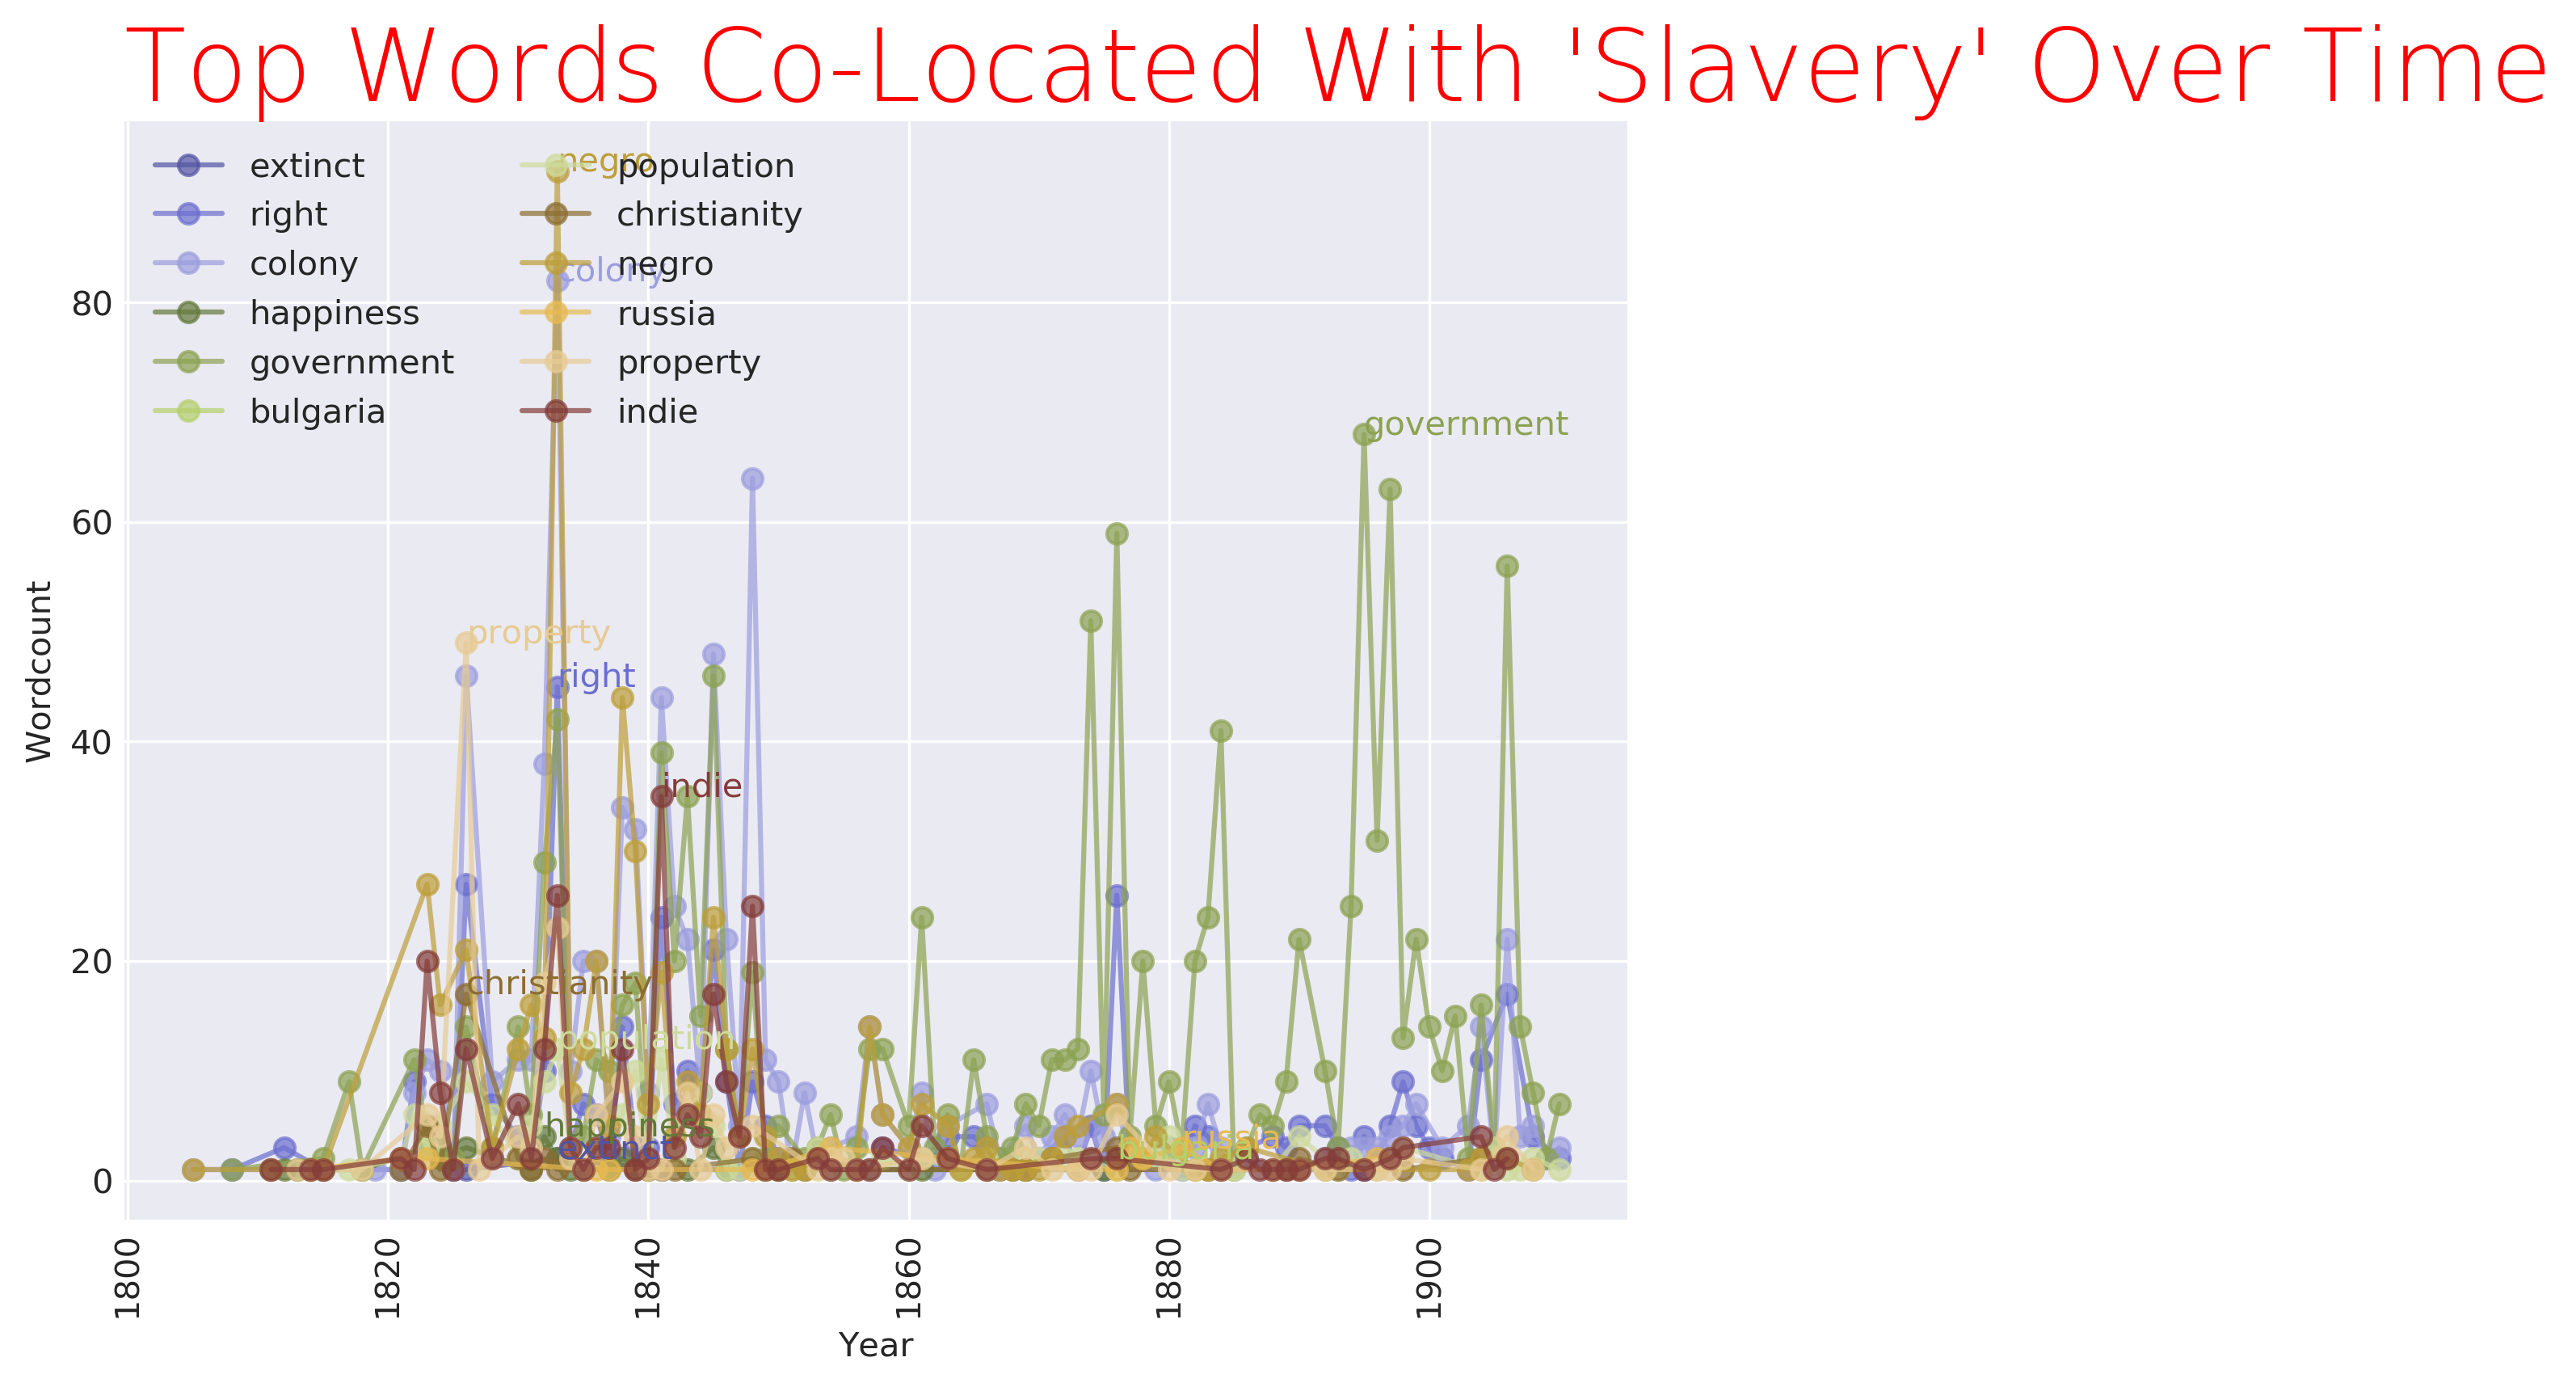

In [188]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import random


%matplotlib inline

figure(figsize=(8, 6), dpi=300)

plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
palette = plt.get_cmap('tab20b') # this tells matplotlib what colors to use.  you can play with this to change the colors.

# multiple line plot
num=0

# this is the for loop that creates multiple plots
for word in set(vocab_per_year['vocab']):
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(vocab_per_year.loc[vocab_per_year['vocab'] == word, 'year'], # x axis 
             vocab_per_year.loc[vocab_per_year['vocab'] == word, 'count'],  # y axis
             '-o', # make dots with lines
             color=palette(num), 
             alpha=0.7,
             label = word)
    
    # make labels
    y3 = max(vocab_per_year.loc[vocab_per_year['vocab'] == word, 'count']) # label lines at their highest point
    entity_points = vocab_per_year[vocab_per_year['vocab'] == word]
    x3 = random.choice(entity_points[entity_points['count'] == max(entity_points['count'])]['year'].tolist()) # more for finding the highest point
    plt.text(x3, y3, word, color = palette(num), size = 10) # this is the code to supply a label for each line


             
    
# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Co-Located With 'Slavery' Over Time", loc='left', fontsize=30, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")

plt.savefig('slavery-collocates-hansard.jpg')
plt.show()

